In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads - Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
data.shape

(400, 5)

In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
data.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
data.iloc[:,2:4].values

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


Text(0.5, 0, 'Age')

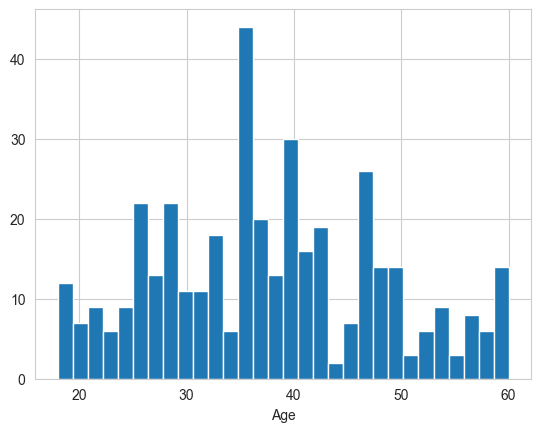

In [12]:
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')

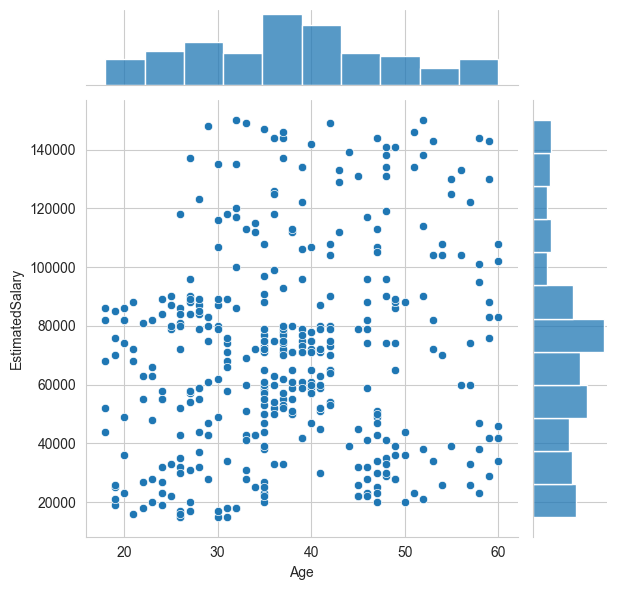

In [13]:
sns.jointplot(x='Age', y='EstimatedSalary', data = data)

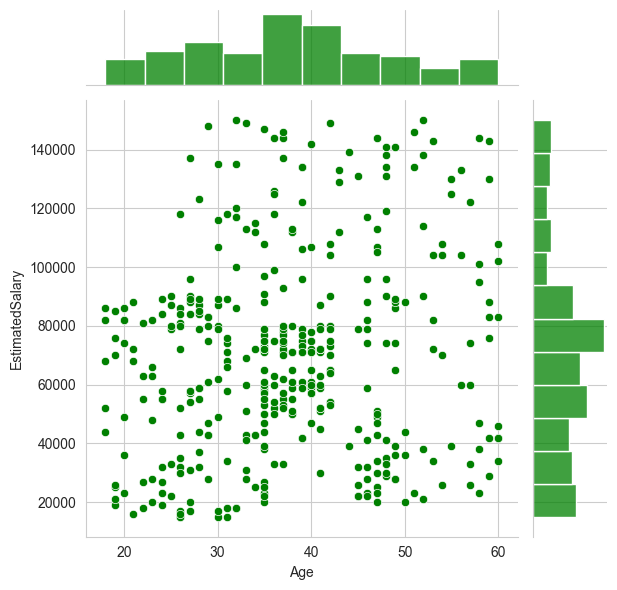

In [14]:
sns.jointplot(x='Age',y='EstimatedSalary',data= data,color='green')

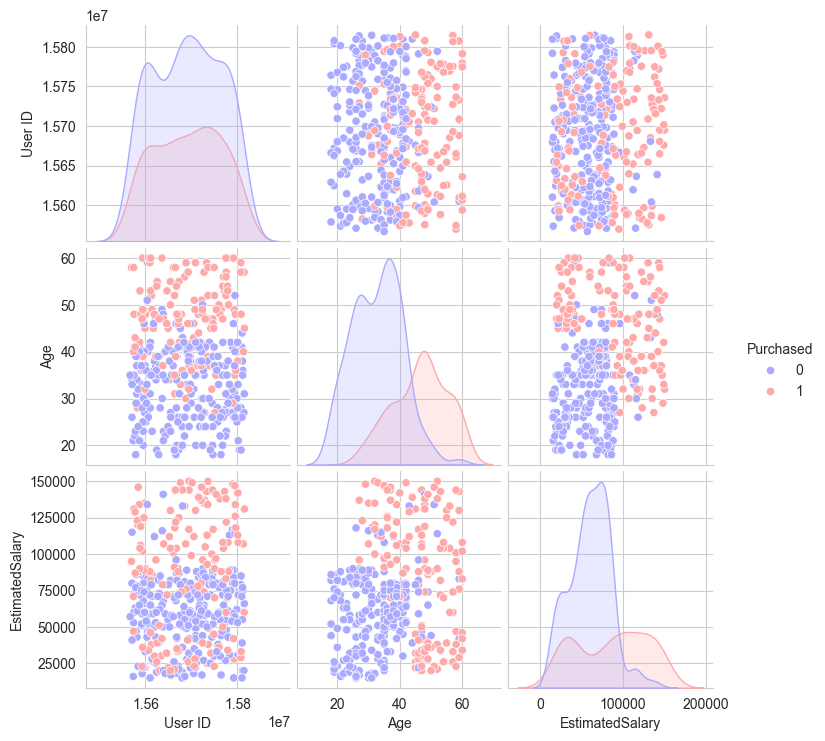

In [15]:
sns.pairplot(data,hue='Purchased',palette='bwr')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
X_train.shape

(300, 2)

In [20]:
X_test.shape

(100, 2)

In [21]:
y_train.shape

(300,)

In [22]:
y_test.shape

(100,)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[65  3]
 [ 8 24]]


First 5 rows : 
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
last 5 rows : 
       User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1
any 5 rows : 
       User ID  Gender  Age  EstimatedSalary  Purchased
127  15745232    Male   26            32000          0
160  15744279    Male   32           100000          1
72   15595228  Female   20            23000          0
185  15814816    Male   31            66000          0
139  15741094    Male   19   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7300\2033078189.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace =True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7300\2033078189.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

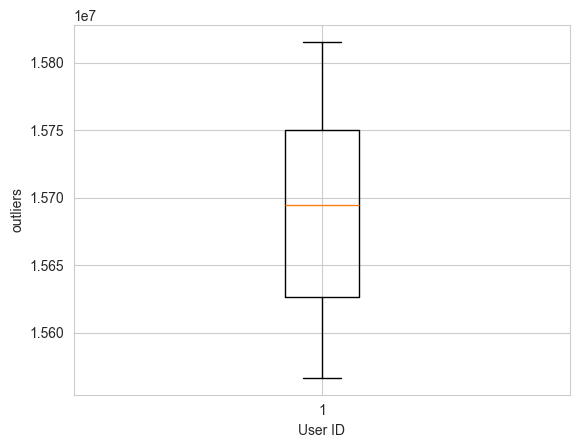

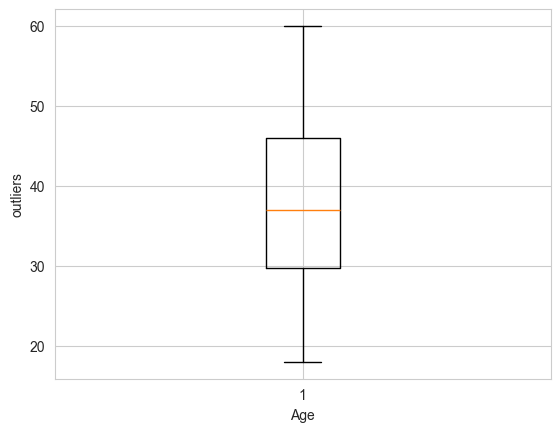

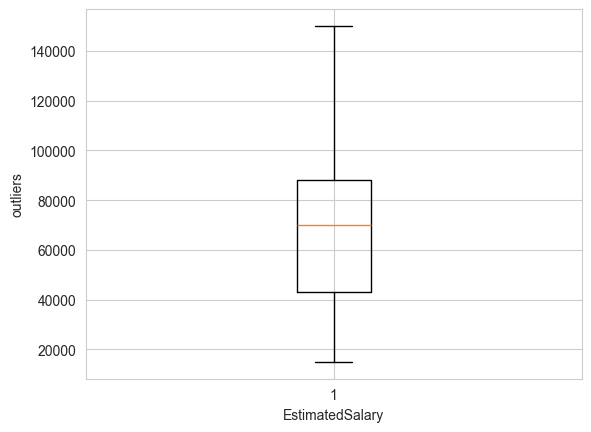

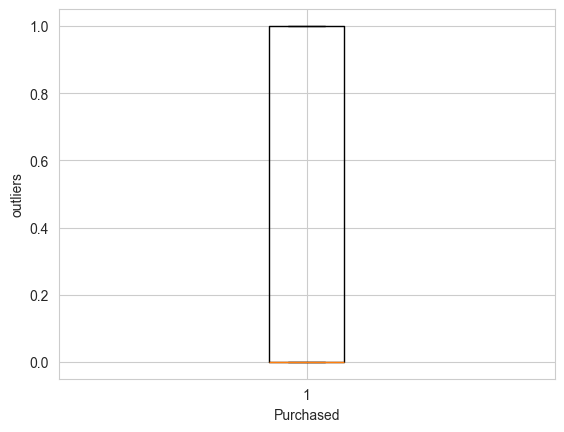

First 5 rows : 
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
y_predict : 
 [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
[[50  2]
 [ 7 21]]
True Positive (TP): 21
True Negative (TN): 50
False Positive (FP): 2
False Negative (FN): 7
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



C:\Users\ASUS\AppData\Local\Temp\ipykernel_7300\2033078189.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male','Female'],[0,1],inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7300\2033078189.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Social_Network_Ads - Social_Network_Ads.csv")

print("First 5 rows : \n",df.head())
print("last 5 rows : \n",df.tail())
print("any 5 rows : \n",df.sample(5))
print("Information : \n",df.info())
print("Data types of column : \n",df.dtypes)
print("Name of the columns :\n",df.columns)
print("Shape of the dataset : ",df.shape,"Size of the dataset : ",df.size)

#Statistical info

print("Statistical information : ",df.describe())

print("Missing values : \n",df.isnull().sum())
for i in df.columns:
    if (df[i].dtypes == 'object'):
        df[i].fillna(df[i].mode()[0],inplace =True)
    else :
        df[i].fillna(df[i].mean(),inplace =True)

print("Missing values : \n",df.isnull().sum())

for i in df.columns:
    if (df[i].dtypes != "object"):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('outliers')
        plt.show()

def RemoveOutlier(df , var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR
    df = df[(df[var] >= low)&(df[var]<=high)]
    print("Box plot after removing oulier :")
    plt.boxplot(df[var])
    plt.xlabel(var)
    plt.ylabel('outliers')
    plt.show()

print("First 5 rows : \n",df.head())


from sklearn.model_selection import train_test_split
df['Gender'].replace(['Male','Female'],[0,1],inplace = True)
x= df.loc[:,['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y = df.iloc[:,-1]
x_train ,x_test,y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train , y_train)

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

y_pred = model.predict(x_test)
print("y_predict : \n",y_pred)
print(confusion_matrix(y_test,y_pred))
cm =confusion_matrix(y_test,y_pred)
TN, FP, FN, TP = cm.ravel()

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print(classification_report(y_test,y_pred))